In [3]:
!pip install emojis

In [4]:
import re
import regex
import pandas as pd
import numpy as np
import emojis
import plotly.express as px
from collections import Counter
import nltk 
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [ ]:
conversationPath='/content/sample_data/_chat.txt'
with open(conversationPath, encoding="utf-8") as fp:
  line = fp.read() 
Datetime=[]
Name=[]
Message=[]
for i in line.split('\n'):
  try: 
    each = i.replace('\u200e','')
    datetime = re.compile(r'^([0-9]+)(\/)([0-9]+)(\/)([0-9][0-9]), ([0-9]+):([0-9][0-9]):[0-9]+ (AM|PM): ')
    dateandtime = (datetime.match(each)[0])
    Datetime.append(dateandtime.replace(': ',''))
    name = each.replace(dateandtime,'')
    author = re.compile(r'([\w]+[\s]+[\w]+):')
    authorname = (author.match(name)[0])
    Name.append(authorname.replace(':',''))
    Message.append(name.replace(authorname,''))
  except TypeError as e:
    Datetime.append("")
    Name.append("")
    Message.append("")
df = pd.DataFrame({'Author':Name,'Message':Message,'Time':Datetime})

In [6]:
df.head(5)

,Date,Time,Author,Message
0,25/6/15,1:42:12 AM,‎,You were added
1,18/12/16,1:57:38 AM,Hulk,<‎image omitted>
2,21/12/16,9:54:46 PM,Fury,<‎image omitted>
3,21/12/16,9:57:45 PM,Hulk,Wow
4,21/12/16,10:48:51 PM,Captain,<‎image omitted>


In [7]:
def split_count(text):
  emoji_list=[]
  data=emojis.get(str(text))
  return data

df["Emoji"] = df["Message"].apply(split_count)

In [12]:
image_messages_df = df[df["Message"] == '<‎image omitted>']
message_df=df.drop(image_messages_df.index)

In [9]:
video_messages_df = df[df["Message"] == '<‎video omitted>']
message_df=df.drop(video_messages_df.index)

In [10]:
gif_messages_df = df[df["Message"] == '<‎GIF omitted>']
message_df=df.drop(gif_messages_df.index)

In [52]:
message_df["Date"] = pd.to_datetime(message_df.Date)

In [53]:
message_df["Time"] = pd.to_datetime(message_df.Time).dt.strftime('%H:%M')

In [54]:
message_df.head(5)

,Date,Time,Author,Message,Emoji,Letter_Count,Word_count
0,2015-06-25,01:42,‎,You were added,{},14,3
3,2016-12-21,21:57,Hulk,Wow,{},3,1
6,2016-12-21,22:50,Natasha,Awsum😀😀👍🏼👍🏼,"{👍, 😀}",11,1
7,2016-12-21,22:51,Captain,🙈,{🙈},1,1
8,2016-12-21,22:57,Falcon,🙂🙂👍🏻👍🏻,"{👍, 🙂}",6,1


In [17]:
message_df['Letter_Count'] = message_df['Message'].apply(lambda s : len(str(s)))
message_df['Word_count'] = message_df['Message'].apply(lambda s : len(str(s).split(' ')))

In [23]:
l = message_df.Author.unique()

for i in range(len(l)):
  req_df=message_df[message_df["Author"] == l[i]]
  print(f'Stats of {l[i]} :')
  print('Message sent',req_df.shape[0])
  words_per_message=(np.sum(req_df['Word_count']))/req_df.shape[0]
  print('words per message', words_per_message)
  emojis = sum(req_df['Emoji'].str.len())
  print('Emoji sent',emojis)
  print()

Stats of ‎  :
Message sent 2
words per message 8.5
Emoji sent 0

Stats of Hulk :
Message sent 70
words per message 4.557142857142857
Emoji sent 47

Stats of Natasha :
Message sent 25
words per message 3.8
Emoji sent 19

Stats of Captain :
Message sent 7
words per message 5.428571428571429
Emoji sent 4

Stats of Falcon :
Message sent 4
words per message 3.5
Emoji sent 3

Stats of Tony Stark :
Message sent 74
words per message 5.3108108108108105
Emoji sent 38

Stats of Loki :
Message sent 5
words per message 1.8
Emoji sent 0

Stats of Thor :
Message sent 12
words per message 6.5
Emoji sent 7

Stats of Wanda :
Message sent 13
words per message 4.230769230769231
Emoji sent 3

Stats of Vision :
Message sent 30
words per message 2.6666666666666665
Emoji sent 22

Stats of Fury :
Message sent 32
words per message 7.46875
Emoji sent 34

Stats of Bucky :
Message sent 26
words per message 3.923076923076923
Emoji sent 23

Stats of King T'Chala :
Message sent 3
words per message 3.3333333333333335


In [24]:
total_emojis_list=list(set([a for b in message_df.Emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

75


In [44]:
total_emojis_list=list([a for b in message_df.Emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(),key=lambda x: x[1],reverse=True)

emoji_df[['emoji','count']] = pd.DataFrame(emoji_dict)

In [47]:
import plotly.express as px
fig = px.pie(emoji_df, values='count',names='emoji',
             title='Emoji Distribution')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

In [50]:
text = " ".join(str(review) for review in message_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 9296 words in all the messages.


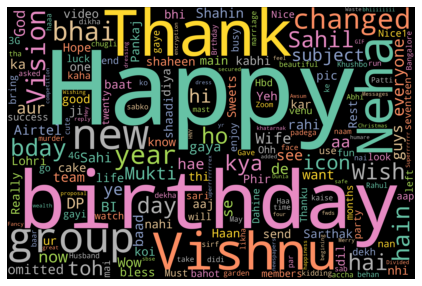

In [51]:
stopwords = set(STOPWORDS)
stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le"])

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False,stopwords = stopwords).generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
date_df=message_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig=px.line(date_df,x="Date",y="Word_count",title="Number of Messages as times moves on")
fig.update_xaxes(nticks=20)
fig.show()

In [66]:
def dayofweek(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(message_df["Message"])
day_df['day_of_date'] = message_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=False
)
fig.show()